In [1]:
from sklearn import datasets
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')

diabetes = datasets.load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = pd.Series(diabetes.target, name='target')
df = pd.concat([data, target], axis=1)

In [2]:
import pandas as pd
import tabularmagic as tm

c:\Users\rzrya\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mtcars = pd.read_csv("mtcars_data/mtcars.csv")
mtcars.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [4]:
analyzer = tm.Analyzer(mtcars, test_size=0.2, name='mtcars dataset from r')
analyzer

INFO: Analyzer initialized. Shapes of train, test DataFrames: (25, 11), (7, 11). 


mtcars dataset from r 
----------------------------------------------------------------------------------------
Train shape: (25, 11)                        Test shape: (7, 11)                        
----------------------------------------------------------------------------------------
Categorical variables:
  None 
                                                                                        
Numeric variables:
  'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb' 

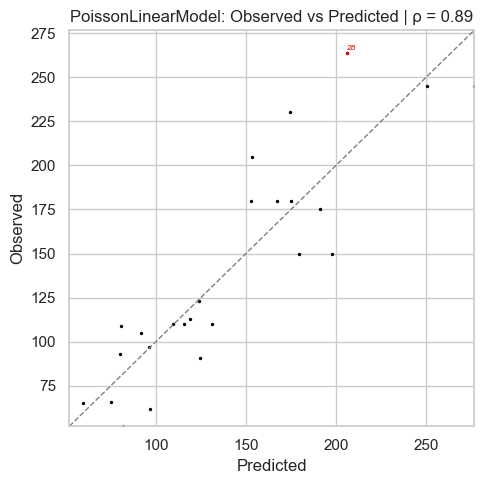

In [5]:
lm_report = analyzer.glm(
    formula='hp ~ am + qsec',
    family = "poisson"
)

#basic_lm = analyzer.lm(formula = 'hp ~ am + qsec')

#type(lm_report)


#print(lm_report.statsmodels_summary())
#print(lm_report.train_report().plot_residuals_vs_fitted(type = 'pearson', show_outliers = 'standardized'))
lm_report.train_report().plot_obs_vs_pred()

#.plot_obs_vs_pred()
#lm_report.step()
#basic_lm.train_report().plot_obs_vs_pred()


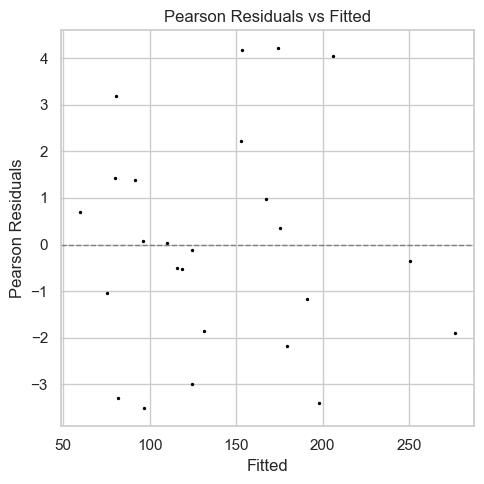

In [6]:
lm_report.train_report().plot_residuals_vs_fitted(type = 'pearson')

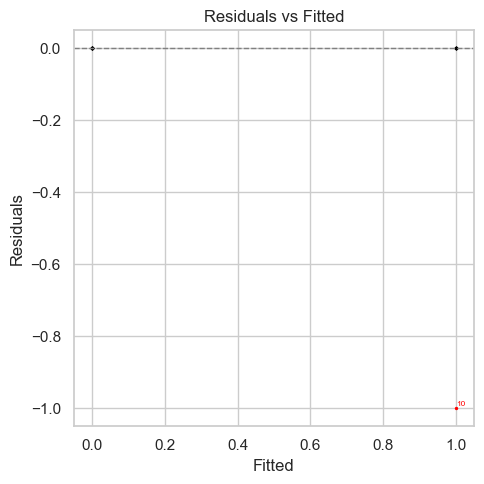

In [7]:
bin_report = analyzer.glm(
    formula='am ~ drat',
    family = "binomial"
)
bin_report.train_report().plot_residuals_vs_fitted()


In [8]:
# Test to see if partialF works

lm_report_red = analyzer.lm(
    formula='hp ~ am + qsec'
)

lm_report_full = analyzer.lm(
    formula='hp ~ am + qsec + gear'
)

#Confirm it works both ways:

lm_report_full.test_partialf(lm_report_red)
lm_report_red.test_partialf(lm_report_full)

lm_report_red.test_lr(lm_report_full)
lm_report_full.test_lr(lm_report_red)

Likelihood Ratio Test 
----------------------------------------------------------------------------------------
Chi-square: 0.82857                        p-value: 3.62686e-01                          
----------------------------------------------------------------------------------------
H0: The full model does not fit the data significantly better than the reduced model 
HA: The full model fits the data signficantly better than the reduced model 
Degrees of freedom: 1.0 
Assumptions: The data must be homoscedastic and uncorrelated 

In [9]:
# Confirm that value error is raised when we do not have a subset

lm_report_red = analyzer.lm(
    formula='hp ~ am + qsec + wt'
)

lm_report_full = analyzer.lm(
    formula='hp ~ am + qsec + gear + drat'
)

lm_report_red.test_lr(lm_report_full)
lm_report_full.test_lr(lm_report_red)

ValueError: One model must be a reduced version of the other

In [11]:
# test lr and partialf tests with poisson:

lm_report_red = analyzer.glm(
    formula='hp ~ am + qsec',
    family = "poisson"
)

lm_report_full = analyzer.glm(
    formula='hp ~ am + qsec + gear',
    family = "poisson"
)


#lm_report_red.test_lr(lm_report_full)
#lm_report_full.test_lr(lm_report_red)
lm_report_full.test_partialf(lm_report_red)


AttributeError: 'GLMResults' object has no attribute 'compare_f_test'